In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from dateutil.relativedelta import relativedelta
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch

In [2]:
plt.rcParams['axes.unicode_minus']= False
if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-whitegrid')
    rc('font', family = 'AppleGothic')

In [3]:
# 파일 로드
건축허가현황 = pd.read_csv('./data/건축허가현황.csv')
국내건설수주액 = pd.read_csv('./data/국내건설수주액.csv')
아파트실거래가격지수 = pd.read_csv('./data/아파트 실거래가격지수.csv')
주택건설인허가실적 = pd.read_csv('./data/주택건설인허가실적.csv')
주택월세통합가격지수 = pd.read_csv('./data/유형별_주택월세통합가격지수.csv')
주택매매가격지수 = pd.read_csv('./data/주택매매가격지수(KB).csv')
주택전세가격지수 = pd.read_csv('./data/주택전세가격지수(KB).csv')
지역별지가변동률 = pd.read_csv('./data/지역별_지가변동률.csv')
역대대통령 = pd.read_csv('./data/역대성향별정권.csv')
역대대통령

,년월,대통령이름,당성향
0,1993.2.1,김영삼,보수
1,1993.3.1,김영삼,보수
2,1993.4.1,김영삼,보수
3,1993.5.1,김영삼,보수
4,1993.6.1,김영삼,보수
...,...,...,...
342,2021.8.1,문재인,진보
343,2021.9.1,문재인,진보
344,2021.10.1,문재인,진보
345,2021.11.1,문재인,진보


In [4]:
역대대통령['년월'] = 역대대통령['년월'].apply(lambda x : datetime.strptime(x,'%Y.%m.%d'))
역대대통령['년월'] = 역대대통령['년월'].astype(str)
역대대통령['년월'] = 역대대통령['년월'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
사용할대통령 = ['노무현','이명박','박근혜','문재인']
역대대통령 = 역대대통령.query('대통령이름 in @사용할대통령')
역대대통령 = 역대대통령.reset_index(drop=True)

In [5]:
역대대통령

,년월,대통령이름,당성향
0,2003-03-01,노무현,진보
1,2003-04-01,노무현,진보
2,2003-05-01,노무현,진보
3,2003-06-01,노무현,진보
4,2003-07-01,노무현,진보
...,...,...,...
221,2021-08-01,문재인,진보
222,2021-09-01,문재인,진보
223,2021-10-01,문재인,진보
224,2021-11-01,문재인,진보


In [6]:
지역별지가변동률['Unnamed: 0'] = 지역별지가변동률['Unnamed: 0'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
지역별지가변동률.rename(columns={"Unnamed: 0" :'년월' },inplace=True)
대통령과지역별지가변동률df = pd.merge(역대대통령,지역별지가변동률)
대통령과지역별지가변동률df = 대통령과지역별지가변동률df.melt(id_vars=대통령과지역별지가변동률df.columns[:3],value_vars=대통령과지역별지가변동률df.columns[3:],
                 var_name='구분',value_name = '값')
대통령과지역별지가변동률df['구분'] = 대통령과지역별지가변동률df['구분'].apply(lambda x : x.replace("[%]",""))
대통령과지역별지가변동률df

,년월,대통령이름,당성향,구분,값
0,2005-01-01,노무현,진보,전국,0.226
1,2005-02-01,노무현,진보,전국,0.184
2,2005-03-01,노무현,진보,전국,0.348
3,2005-04-01,노무현,진보,전국,0.525
4,2005-05-01,노무현,진보,전국,0.562
...,...,...,...,...,...
3487,2020-10-01,문재인,진보,제주,-0.088
3488,2020-11-01,문재인,진보,제주,-0.068
3489,2020-12-01,문재인,진보,제주,-0.004
3490,2021-01-01,문재인,진보,제주,-0.012


In [7]:
주택매매가격지수.columns
주택매매가격지수['Unnamed: 0'] = 주택매매가격지수['Unnamed: 0'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
주택매매가격지수.rename(columns={"Unnamed: 0" :'년월' },inplace=True)
대통령과주택매매가격지수df = pd.merge(역대대통령,주택매매가격지수)
대통령과주택매매가격지수df = 대통령과주택매매가격지수df.melt(id_vars=대통령과주택매매가격지수df.columns[:3],value_vars=대통령과주택매매가격지수df.columns[3:],
                 var_name='구분',value_name = '값')
대통령과주택매매가격지수df['구분'] = 대통령과주택매매가격지수df['구분'].apply(lambda x : x.replace("[2019.01=100]",""))

In [8]:
대통령과주택매매가격지수df

,년월,대통령이름,당성향,구분,값
0,2003-03-01,노무현,진보,총지수,63.242
1,2003-04-01,노무현,진보,총지수,63.813
2,2003-05-01,노무현,진보,총지수,64.850
3,2003-06-01,노무현,진보,총지수,65.317
4,2003-07-01,노무현,진보,총지수,65.463
...,...,...,...,...,...
1297,2020-11-01,문재인,진보,총지수(서울),112.139
1298,2020-12-01,문재인,진보,총지수(서울),113.532
1299,2021-01-01,문재인,진보,총지수(서울),114.974
1300,2021-02-01,문재인,진보,총지수(서울),116.290


In [9]:
건축허가현황.columns
#건축허가현황에서는 정권에 따른 주거,상업,공업용 건축허가 면적을 비교함
#'연면적-주거용[㎡]', '연면적-상업용[㎡]', '연면적-공업용[㎡]'

Index(['Unnamed: 0', '연면적-철근·철골조[㎡]', '연면적-조적조[㎡]', '연면적-목조[㎡]',
       '연면적-기타(자재별)[㎡]', '연면적-주거용[㎡]', '연면적-상업용[㎡]', '연면적-공업용[㎡]',
       '연면적-교육및사회용[㎡]', '연면적-기타(용도별)[㎡]', '연면적-자재별[㎡]', '연면적-용도별[㎡]',
       '동수-철근·철골조[동수]', '동수-조적조[동수]', '동수-목조[동수]', '동수-기타(자재별)[동수]',
       '동수-주거용[동수]', '동수-상업용[동수]', '동수-공업용[동수]', '동수-교육및사회용[동수]',
       '동수-기타(용도별)[동수]', '동수-자재별[동수]', '동수-용도별[동수]'],
      dtype='object')

In [10]:
#총수주액 = 공공부문 + 민간부문
#총수주액 = 건축 + 토목
#공공부문 = 중앙정부 + 지방자치단체 + 공기업 + 기타공공단체
#민간부문 = 제조업 + 비제조업 + 국내외국기업
#건축 = 주택 + 사무실 및 점포 + 공장 및 창고 + 관공서 + 기타
#토목 = 치산 및 치수 + 농림 및 수산 + 도로 및 교량 + 항망 및 공 + 철도 및 궤도 + 상하수도 + 조경공사 + 발전 및 송전 + 토지조성 + 댐 + 기계설치 + 기타 + 조경공사

In [27]:
국내건설수주액

,년월,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
0,1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1,1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
2,1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
3,1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
4,1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2020-10-01,13898995.0,2130904.0,75757.0,564843.0,1356613.0,133691.0,11600248.0,1121580.0,10478668.0,...,140267.0,13790.0,252813.0,118514.0,208652.0,698119.0,126.0,652546.0,36751.0,107825.0
538,2020-11-01,17702517.0,4798382.0,382005.0,716318.0,3295343.0,404716.0,11502935.0,1328975.0,10173960.0,...,444052.0,139721.0,509653.0,105857.0,1625306.0,392054.0,6581.0,1042685.0,563.0,46786.0
539,2020-12-01,29181854.0,10076419.0,733993.0,1837616.0,6059104.0,1445706.0,18803457.0,3528648.0,15274809.0,...,1504356.0,218839.0,1451277.0,289493.0,498000.0,1062329.0,10157.0,1522531.0,5407.0,144768.0
540,2021-01-01,12817543.0,1686611.0,214801.0,612431.0,669493.0,189886.0,10965289.0,2100822.0,8864467.0,...,636642.0,90066.0,157735.0,63284.0,125042.0,349477.0,1044.0,802658.0,76.0,31062.0


In [11]:
국내건설수주액['Unnamed: 0'] = 국내건설수주액['Unnamed: 0'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
국내건설수주액.rename(columns={"Unnamed: 0" :'년월' },inplace=True)
대통령과수주액df = pd.merge(역대대통령,국내건설수주액)
대통령과수주액df = 대통령과수주액df.melt(id_vars=대통령과수주액df.columns[:3],value_vars=대통령과수주액df.columns[3:],
                 var_name='구분',value_name = '값')
대통령과수주액df['구분'] = 대통령과수주액df['구분'].apply(lambda x : x.replace("[백만원]",""))

In [12]:
presidents_inaug_dates = {
    '노무현' : '2003-03-01',
    '이명박' : '2008-03-01',
    '박근혜' : '2013-03-01',
    '문재인' : '2017-05-01'
}

In [13]:
총수주액1 = ['공공부문', '민간부문']
총수주액2 = ['건축','토목']
공공부문수주액 = ['중앙정부','지방자치단체','공기업','기타공공단체']
민간부문수주액 = ['제조업','비제조업','국내외국기업']
건축수주액 = ['주택' ,'사무실 및 점포' ,'공장 및 창고' , '관공서' ,'기타']
토목수주액 = ['치산 및 치수', '농림 및 수산', '도로 및 교량', '항망 및 공항', '철도 및 궤도','상하수도','조경공사','발전 및 송전','토지조성','댐','기계설치', '기타', '조경공사']
전국매매지수 = ['단독주택','연립주택','아파트']
서울매매지수 = ['아파트(서울)']
지가변동률 = ['서울','경기','제주']

In [14]:
def presidentline(presidents_inaug_dates, max_value):
    for president, inaug_date in presidents_inaug_dates.items():
        if president == '박근혜' or president == '문재인':
            y = 2
            m = 4
        else:
            y = 2
            m = 5
        inaug_date = datetime.strptime(inaug_date, '%Y-%m-%d')
        plt.axvline(inaug_date, linestyle='--', color = 'black')
        plt.text(inaug_date +relativedelta(years=y, month=m), y = max_value, s = president, fontsize=11)

def lineplot_presidentline(df,리스트):
    temp_df = df.query('구분 in @ 리스트')
    max_value = temp_df['값'].max() *0.95
    sns.lineplot(data=temp_df,x='년월',y=f'값',hue='구분')
    plt.title(f'총계',fontsize=20,fontweight='bold')
    plt.legend(loc = 'upper left', bbox_to_anchor=(0.05,0.9))
    presidentline(presidents_inaug_dates,max_value)

def lineplot(df,리스트,title):
    temp_df = df.query('구분 in @ 리스트')
    max_value = temp_df['값'].max() *0.95
    sns.lineplot(data=temp_df,x='년월',y=f'값',hue='구분')
    plt.title(f'{title} 상세',fontsize=15,fontweight='bold')
    plt.xticks(rotation=45)

In [15]:
def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.1

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


In [16]:
def zoom_effect(ax1, ax2, **kwargs):
    """
    ax2 : the big main axes
    ax1 : the zoomed axes
    The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=3, loc1b=1, loc2b=4,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


In [17]:
def triple_grap(df,main,sub):
    plt.figure(figsize=(15,10))
    ax1 = plt.subplot(2,1,1)
    lineplot_presidentline(df, [f'{main}'])
    ax1.annotate(
        'straight',
        xy=(0, 1), xycoords='data',
        xytext=(-50, 30), textcoords='offset points',
        arrowprops=dict(arrowstyle="->"))

    ax2 = plt.subplot(2,2,3)
    lineplot(df.query(f'"2008-03-01" <= 년월 < "2013-03-01"'), sub, '이명박임기')
    zoom_effect(ax2, ax1)
    ax3 = plt.subplot(2,2,4)
    lineplot(df.query(f'"2017-05-01" <= 년월'),sub,'문재인임기')
    zoom_effect(ax3, ax1)
    plt.show()

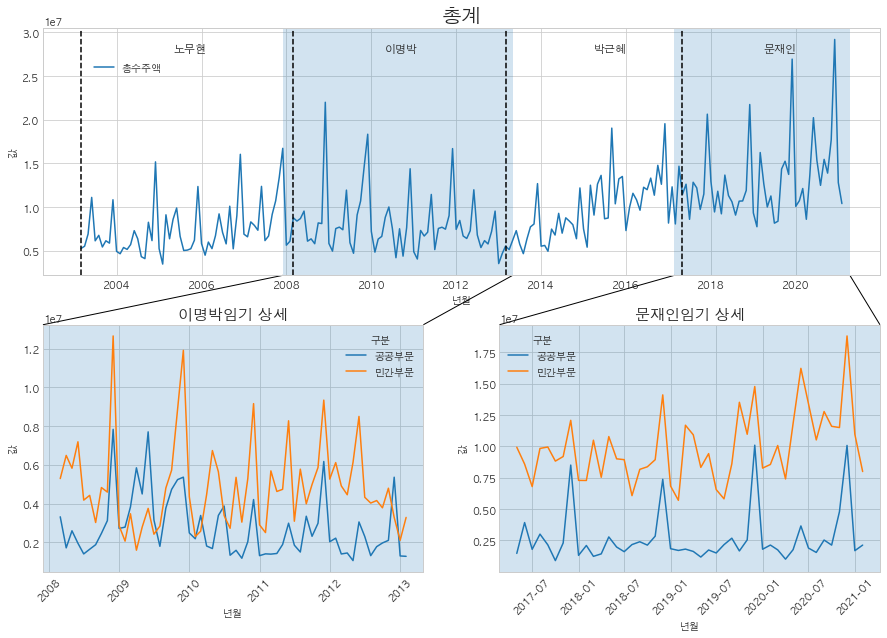

In [18]:
triple_grap(df = 대통령과수주액df,main="총수주액",sub =총수주액1)

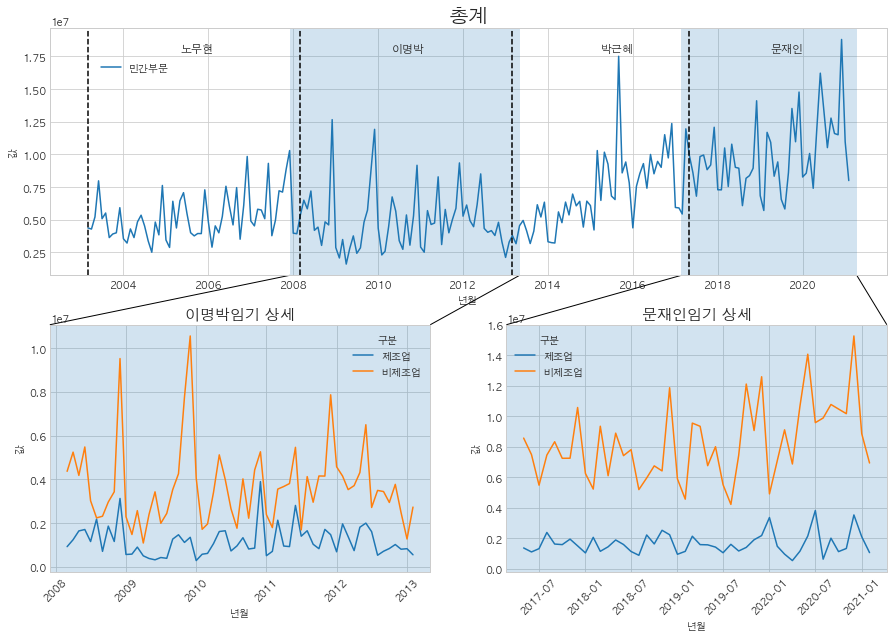

In [19]:
triple_grap(df = 대통령과수주액df,main="민간부문",sub =민간부문수주액)

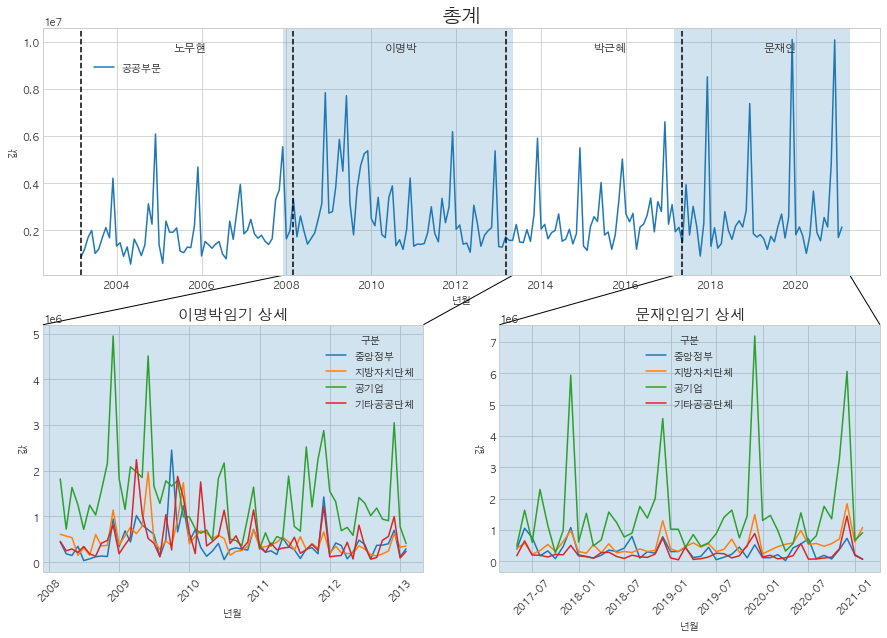

In [20]:
triple_grap(df = 대통령과수주액df,main="공공부문",sub =공공부문수주액)

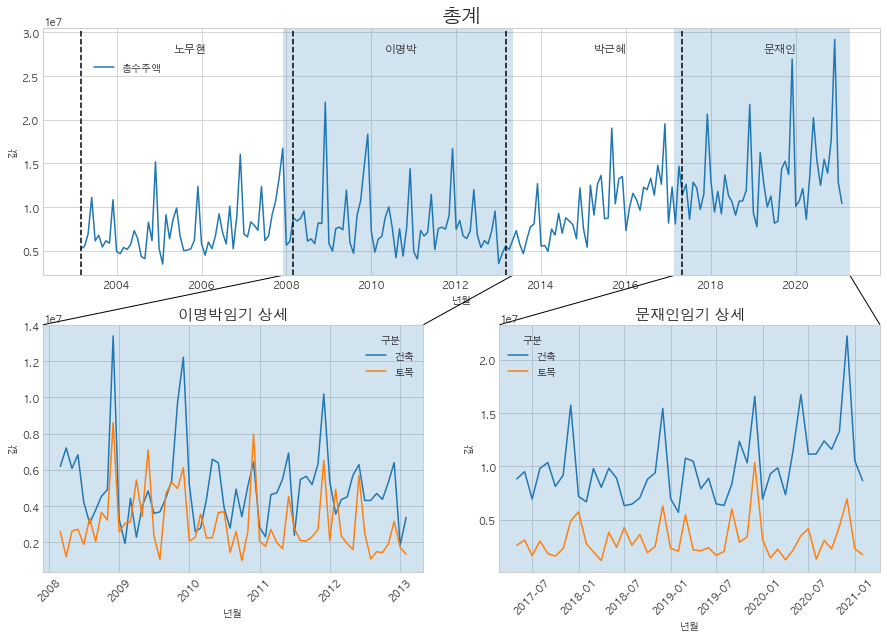

In [21]:
triple_grap(df = 대통령과수주액df,main="총수주액",sub =총수주액2)

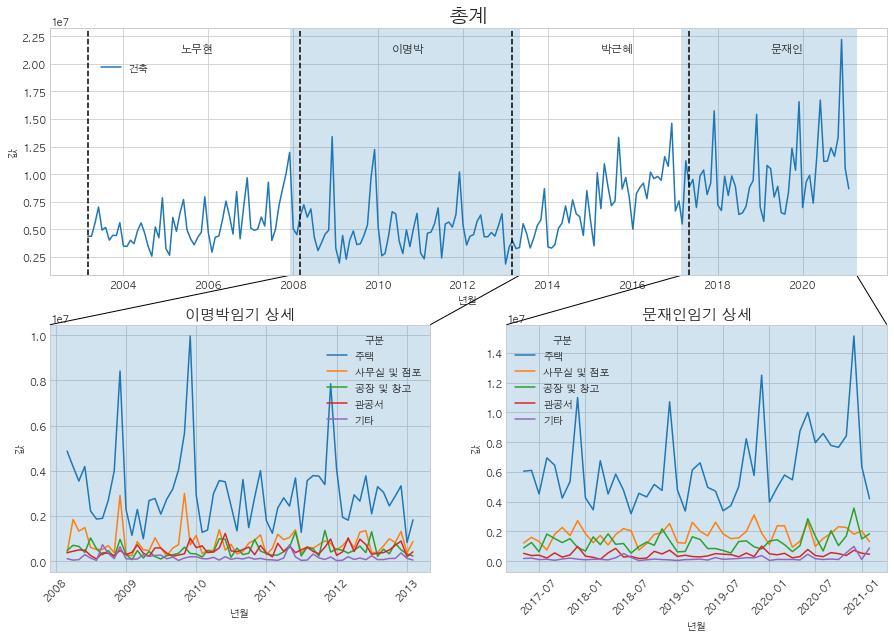

In [22]:
triple_grap(df = 대통령과수주액df,main="건축",sub =건축수주액)

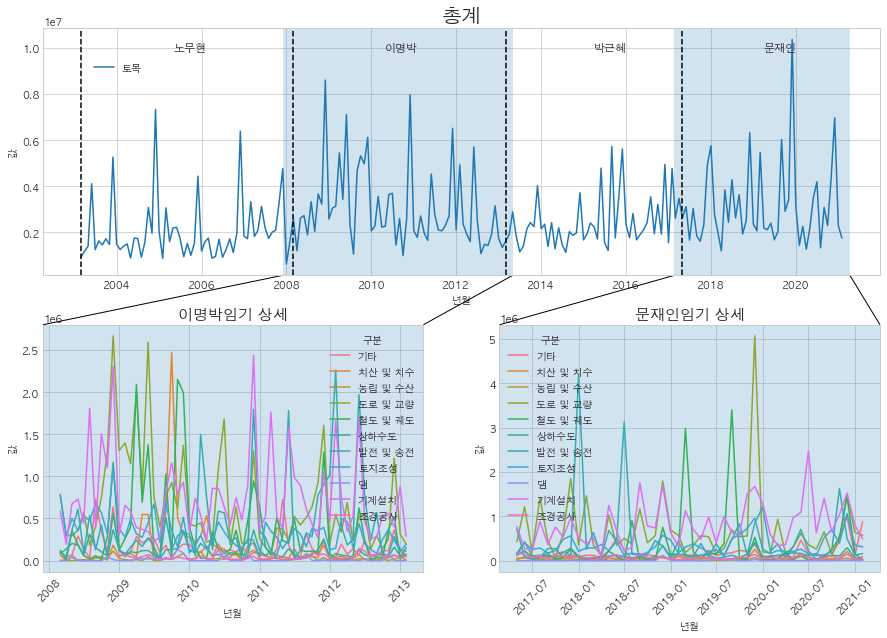

In [23]:
triple_grap(df = 대통령과수주액df,main="토목",sub =토목수주액)

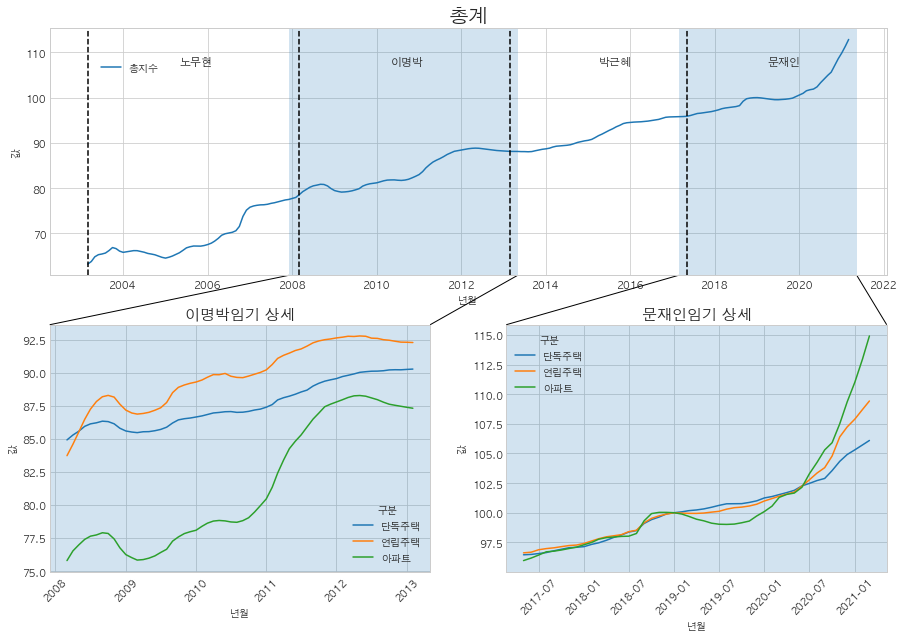

In [24]:
triple_grap(df = 대통령과주택매매가격지수df,main="총지수",sub =전국매매지수)

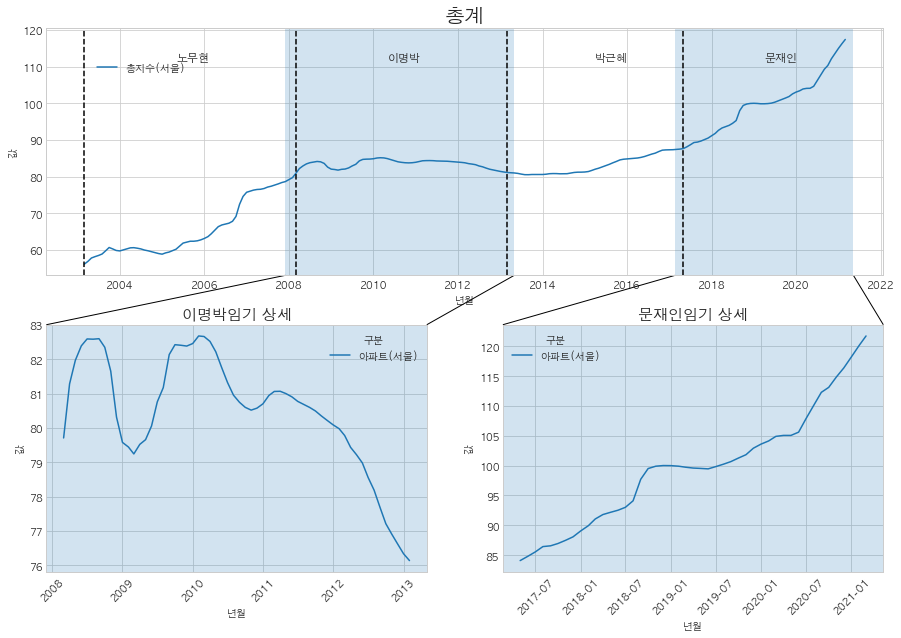

In [25]:
triple_grap(df = 대통령과주택매매가격지수df,main="총지수(서울)",sub =서울매매지수)

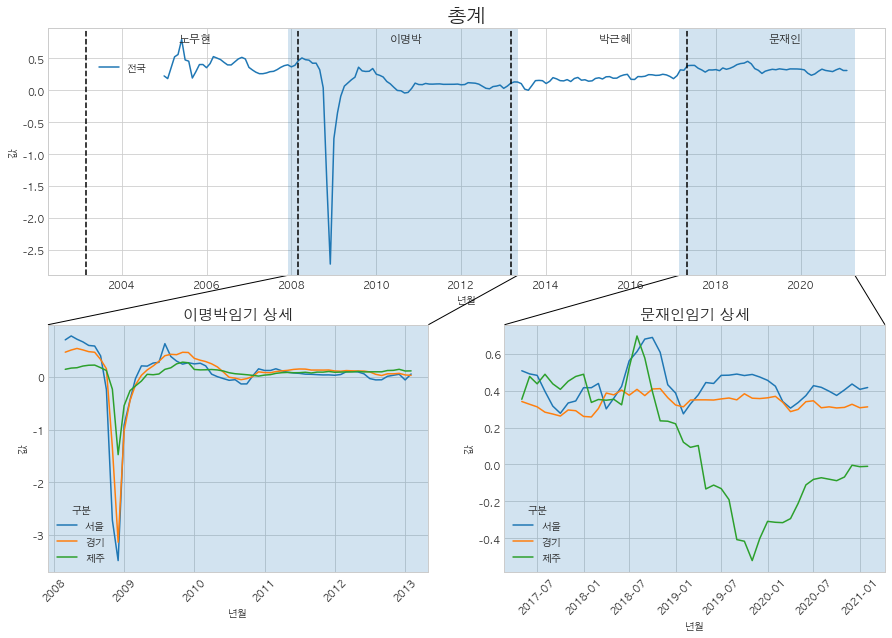

In [26]:
triple_grap(df = 대통령과지역별지가변동률df,main="전국",sub =지가변동률)